In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline


In [2]:
# необходимо предсказать доход населения

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 
          'education-num', 'marital-status', 'occupation',
          'relationship', 'race', 'sex', 'capital-gain', 
          'capital-loss', 'hours-per-week', 'native-country', 'salary']

df = pd.read_csv('adult.data', header=None, names=columns, na_values='?')


df = df.drop('education', axis = 1)
df['salary'] = df['salary'].map({' <=50K':0, ' >50K':1})
df = df.dropna()

test = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)
test = test.drop('education', axis = 1)
test['salary'] = test['salary'].map({' <=50K.':0, ' >50K.':1})
test = test.dropna()



In [4]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [6]:
df['salary'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [7]:
X_train = pd.get_dummies(df).drop('salary', axis=1)
y_train = df['salary']


In [8]:
# бинаризуем переменные, они в категориальной шкале

X_test = pd.get_dummies(test).drop('salary', axis=1)
y_test = test['salary']


In [9]:
# после бинаризации в обучающей и тестовой выборке
#разное количество столбцов



In [10]:
print(len(X_train.columns))
print(len(X_test.columns))

print(set(X_train.columns)-set(X_test.columns))
print(set(X_test.columns)-set(X_train.columns))

92
87
{'workclass_ Never-worked', 'workclass_ ?', 'native-country_ Holand-Netherlands', 'native-country_ ?', 'occupation_ ?'}
set()


In [11]:
# исправим разницу в количестве стобцов

columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns=columns).fillna(0)
X_test = X_test.reindex(columns=columns).fillna(0)


In [12]:
# проверка
all(X_train.columns == X_test.columns)

True

In [13]:
X_train.head()

,occupation_ Priv-house-serv,native-country_ Trinadad&Tobago,occupation_ Prof-specialty,marital-status_ Married-civ-spouse,occupation_ Tech-support,marital-status_ Divorced,native-country_ United-States,native-country_ Canada,relationship_ Not-in-family,native-country_ Greece,...,native-country_ Ecuador,native-country_ Japan,workclass_ Without-pay,education-num,workclass_ Private,occupation_ Transport-moving,workclass_ Self-emp-not-inc,native-country_ India,native-country_ Ireland,marital-status_ Widowed
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,13,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,13,0,0,1,0,0,0
2,0,0,0,0,0,1,1,0,1,0,...,0,0,0,9,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,7,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,13,1,0,0,0,0,0


In [14]:
# можно объединять классы

In [15]:
from sklearn.metrics import classification_report

from xgboost import XGBClassifier


In [16]:
# очень важна игра с параметрами

model = XGBClassifier(seed=42, 
                     # 
                      n_estimators=100,
                     max_depth=6,
                     learning_rate=0.3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     24720
           1       0.84      0.73      0.78      7841

    accuracy                           0.90     32561
   macro avg       0.88      0.84      0.86     32561
weighted avg       0.90      0.90      0.90     32561

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11360
           1       0.77      0.66      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.86     15060



In [17]:
import seaborn as sns
sns.set(font_scale = 1.5)

In [18]:
import xgboost as xgb

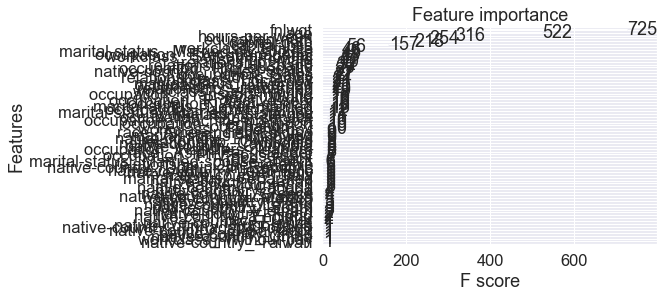

In [19]:
xgb.plot_importance(model)

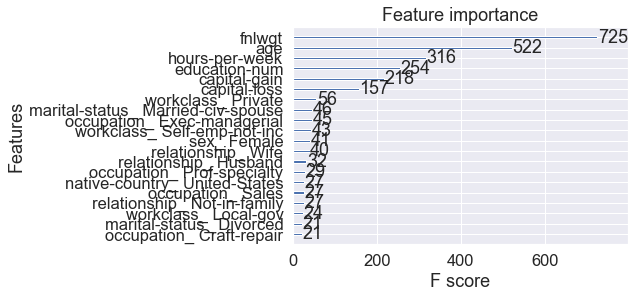

In [20]:
xgb.plot_importance(model, max_num_features=20)

In [ ]:
# если отбросить неинформативные переменные, то понизим качество на обучении, но повысим на тесте



In [25]:
#ВАЛИДАЦИЯ
from sklearn.model_selection import GridSearchCV


In [26]:
zzz = GridSearchCV(cv=5, error_score='raise',
                  estimator=XGBClassifier(base_score=0.5, 
                                         colsample_bylevel=1
                                         #colsample_bytree=0.8,
                                         gamma=0, learning_rate=0.1,
                                         max_delta_step=0, max_depth=3,
                                         min_child_weight=1, missing=None, n_estimators=100,
                                         nthread=-1, objective='binary:logistic', reg_alpha=0,
                                         reg_lambda=1, scale_pos_weight=1, seed=1234, silent=True, subsample=0.8),
                fit_params={}, iid=True, n_jobs=-1,
                  param_grid={'min_child_weght':[1,3,5],
                             'max_depth':[3,5,7]}, pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)




SyntaxError: invalid syntax (<ipython-input-26-2fba59dfd51e>, line 5)

In [28]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.05, 0.1, 0.3]
}

In [29]:
zzz = GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, 
       colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


TypeError: __init__() got an unexpected keyword argument 'fit_params'